#              EDA - Lending Club Case Study


    Group Members:  Abhishek Das 
                    Ashutosh Kulkarni (Group Facilitator)


In [1]:

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

# To map Empty Strings or numpy.inf as Na Values
pd.options.mode.use_inf_as_na = True

# Set Precision to 8 for better readability
pd.set_option('display.precision', 8)
pd.options.display.float_format = '{:.4f}'.format

pd.options.display.expand_frame_repr =  False

# Set Style
sns.set_style("dark")
sns.set(style = "whitegrid")

# Ignore Warnings
warnings.filterwarnings('ignore')

In [2]:
def displayLables(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


In [3]:
# Function to plot a given column buckets against loan_status (default = 'Charged Off')
def plotByLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    percentages = grp.unstack() * 100 / cnt.T
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    displayLables(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [4]:
# Function to plot two plots side by side 
# Left hand side plot is percentage of a categorical variable in the entire dataset 
# Right hand side plot is percentage of a categorical variable for Charged Off loans 
def plotByPercentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (loan_data[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    displayLables(ax)
    plt.subplot(1, 2, 2)
    values = (loan_data.loc[loan_data['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    displayLables(ax)

In [5]:
# Function to plot the count plot for categorical variable
def plotCategorical(data, plot_type, series, xlabel, ylabel, x_axis,
                        hue = 'loan_status',
                        legend = 'upper center',
                        figsize_x=15,
                        figsize_y=6,
                        subplot_x=1,
                        subplot_y=2,
                        hspace=0,
                        wspace=0.3,
                        xlabel_rotation=0):
    
    plt.figure(figsize = (figsize_x, figsize_y))
    
    title_1 = "Frequency Plot of " + xlabel
    title_2 = title_1 + " across Loan Status"
        
    # Subplot - 1
    plt.subplot(subplot_x, subplot_y, 1)
        
    if plot_type == 'Unordered Categorical':
        sns.lineplot(data = series)
        
    elif plot_type == 'Ordered Categorical':
        sns.countplot(x = x_axis, order = series.sort_index().index, data = data)
        
    # Call Custom Function
    setPlottingVariables(title_1, xlabel, ylabel, xlabel_rotation, False, legend)
        
     # Subplot - 2
    plt.subplot(subplot_x, subplot_y, 2)
        
    sns.countplot(x = x_axis, hue = hue, order = series.sort_index().index, data = data)
    
    # Call Custom Function
    setPlottingVariables(title_2, xlabel, ylabel, xlabel_rotation, True, legend)
    
    plt.subplots_adjust(hspace = hspace)
    plt.subplots_adjust(wspace = wspace)
    plt.show()

In [6]:
# Function to plot the count plot for continuous variable
def plotContinuous(data, plot_type, series, xlabel, ylabel, x_axis,
                        hue = 'loan_status',
                        legend = 'best',
                        figsize_x=15,
                        figsize_y=12,
                        subplot_x=2,
                        subplot_y=2,
                        hspace=0.4,
                        wspace=0.3,
                        xlabel_rotation=0):                    
    
    plt.figure(figsize = (figsize_x, figsize_y))
    

        
    title_1 = "Distribution Plot of " + xlabel
    title_2 = "Box Plot of " + xlabel
    title_3 = title_2 + " across Loan Status"
        
    # Subplot - 1
    plt.subplot(subplot_x, subplot_y, 1)
        
    sns.distplot(data[x_axis], hist = True, kde = True, color = 'g')
    # Call Custom Function
    setPlottingVariables(title_1, xlabel, ylabel, xlabel_rotation, False, legend)
        
    # Subplot - 2
    plt.subplot(subplot_x, subplot_y, 2)
        
    sns.boxplot(x = x_axis, data = data, color = 'm')
    # Call Custom Function
    setPlottingVariables(title_2, xlabel, ylabel, xlabel_rotation, False, legend)
        
    # Subplot - 3
    plt.subplot(subplot_x, subplot_y, 3)
        
    sns.boxplot(x = x_axis, y = hue, order = series, data = data)
    # Call Custom Function
    setPlottingVariables(title_3, xlabel, "Loan Status", xlabel_rotation, False, legend)
    
    plt.subplots_adjust(hspace = hspace)
    plt.subplots_adjust(wspace = wspace)
    plt.show()

In [7]:
# Custom Function to set the default Plotting variables
def setPlottingVariables(figure_title, xlabel, ylabel, xlabel_rotation, legend_flag, legend):
    
    plt.title(figure_title)
    plt.xticks(rotation = xlabel_rotation)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(ylabel, labelpad = 10)
    
    if legend_flag == True:
        plt.legend(loc = legend)

## Step-1. Data Sourcing

In [8]:
# 1.1 Read the loan csv file.
loan_data = pd.read_csv('loan.csv', encoding = 'ISO-8859-1', low_memory=False)

# 1.2 Review data
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0000,36 months,10.65%,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.6500,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0000,0.0000,5863.1552,5833.8400,5000.0000,863.1600,0.0000,0.0000,0.0000,Jan-15,171.6200,NaN,May-16,0.0000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0000,60 months,15.27%,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0000,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,Apr-13,119.6600,NaN,Sep-13,0.0000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0000,36 months,15.96%,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.7200,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0000,0.0000,3005.6668,3005.6700,2400.0000,605.6700,0.0000,0.0000,0.0000,Jun-14,649.9100,NaN,May-16,0.0000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0000,36 months,13.49%,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.0000,0,Feb-96,1,35.0000,NaN,10,0,5598,21%,37,f,0.0000,0.0000,12231.8900,12231.8900,10000.0000,2214.9200,16.9700,0.0000,0.0000,Jan-15,357.4800,NaN,Apr-16,0.0000,NaN,1,INDIVIDUAL,N

## Step-2. Data cleaning

In [9]:
# 2.1 Identify the initial DataFrame Shape
loan_data.shape

(39717, 111)

#### Data Cleaning : Fix missing values

In [10]:
# 2.2 Identify the NULL or NaN values Percentage for each column
missing_loan_data = round(100*(loan_data.isnull().sum()/len(loan_data.id)), 2)
missing_loan_data.loc[missing_loan_data > 0]

emp_title                          6.1900
emp_length                         2.7100
desc                              32.5800
title                              0.0300
mths_since_last_delinq            64.6600
mths_since_last_record            92.9900
revol_util                         0.1300
last_pymnt_d                       0.1800
next_pymnt_d                      97.1300
last_credit_pull_d                 0.0100
collections_12_mths_ex_med         0.1400
mths_since_last_major_derog      100.0000
annual_inc_joint                 100.0000
dti_joint                        100.0000
verification_status_joint        100.0000
tot_coll_amt                     100.0000
tot_cur_bal                      100.0000
open_acc_6m                      100.0000
open_il_6m                       100.0000
open_il_12m                      100.0000
open_il_24m                      100.0000
mths_since_rcnt_il               100.0000
total_bal_il                     100.0000
il_util                          1

Observation :

1. Many columns has 100% NULL or NaN values
2. There are other columns for which the NULL values percentages varying between 2% to 97%

Conclusion: After reviewing all the columns, we can drop all the columns which has NULL values percentage above and equal to 30%  

In [11]:
# 2.3 Drop Columns with null_percentage >=30
missing_value_columns = list(missing_loan_data[missing_loan_data >= 30].index)
loan_data = loan_data.drop(missing_value_columns,axis=1)
loan_data.shape

(39717, 53)

In [12]:
# 2.4 Review the other columns for missing values
missing_loan_data = round(100*(loan_data.isnull().sum()/len(loan_data.id)), 2)
missing_loan_data[missing_loan_data != 0]

emp_title                    6.1900
emp_length                   2.7100
title                        0.0300
revol_util                   0.1300
last_pymnt_d                 0.1800
last_credit_pull_d           0.0100
collections_12_mths_ex_med   0.1400
chargeoff_within_12_mths     0.1400
pub_rec_bankruptcies         1.7500
tax_liens                    0.1000
dtype: float64

The 'emp_title' column captures the job title supplied by the borrower when applying for the loan. The 'emp_length' column captures the employment length in years.

The column 'emp_title' and 'emp_length' have 6.19% and 2.71% missing values. We can remove the rows with NULL / NaN values.

In [13]:
# 2.4.1 Remove rows for missing 'emp_title' and 'emp_length' column values
loan_data=loan_data[~loan_data.emp_title.isnull()]
loan_data=loan_data[~loan_data.emp_length.isnull()]
loan_data.shape

(37202, 53)

In [14]:
# Review the remaining columns for missing values
missing_loan_data = round(100*(loan_data.isnull().sum()/len(loan_data.id)), 2)
missing_loan_data[missing_loan_data != 0]

title                        0.0200
revol_util                   0.1200
last_pymnt_d                 0.1700
collections_12_mths_ex_med   0.1300
chargeoff_within_12_mths     0.1300
pub_rec_bankruptcies         1.7600
tax_liens                    0.0900
dtype: float64

The 'title' column captures the The loan title provided by the borrower. The 'title' column has 0.02% missing values, we can remove rows with null values.

The 'revol_util' column captures the amount of credit the borrower is using relative to all available revolving credit. The 'last_pymnt_d' column captures the Last month when payment was received by LC.

In [15]:
# 2.4.2 Remove rows for missing 'title' column values
loan_data=loan_data[~loan_data.title.isnull()]
loan_data.shape

(37193, 53)

In [16]:
# Review the remaining columns for missing values
missing_loan_data = round(100*(loan_data.isnull().sum()/len(loan_data.id)), 2)
missing_loan_data[missing_loan_data != 0]

revol_util                   0.1200
last_pymnt_d                 0.1700
collections_12_mths_ex_med   0.1300
chargeoff_within_12_mths     0.1300
pub_rec_bankruptcies         1.7600
tax_liens                    0.0900
dtype: float64

We can drop columns 'revol_util', 'last_pymnt_d', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths' and 'tax_liens' as these customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

In [17]:
columns_tobe_dropped = ['revol_util', 'last_pymnt_d', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
loan_data = loan_data.drop(columns_tobe_dropped,axis=1)

loan_data.shape

(37193, 48)

In [18]:
# 2.4.3 Review the column 'pub_rec_bankruptcies' for values
print(loan_data.pub_rec_bankruptcies.value_counts())

print(loan_data.pub_rec_bankruptcies.unique())

0.0000    35030
1.0000     1502
2.0000        7
Name: pub_rec_bankruptcies, dtype: int64
[ 0.  1.  2. nan]


The column 'pub_rec_bankruptcies' represents the past number of public record bankruptcies of that borrower. The column values are 0, 1, 2, and nan. Since there are only 1.76% missing values for the column, we have two options;

   1. Impute the missing values with mode value that is '0'
   2. Remove the rows with missing values

In order to avoid adding any bais to data, let's remove the rows with missing values.

In [19]:
# 2.4.5 Remove the rows where the column'pub_rec_bankruptcies' has nan values
loan_data=loan_data[~loan_data.pub_rec_bankruptcies.isnull()]
loan_data.shape

(36539, 48)

In [20]:
# Review the remaining columns for missing values
missing_loan_data = round(100*(loan_data.isnull().sum()/len(loan_data.id)), 2)
missing_loan_data[missing_loan_data != 0]

Series([], dtype: float64)

There are no columns left with missing data. The overall data set has been reduced to 36433 rows and 50 columns.


#### Data Cleaning : Fix rows and columns

Let's review all the remaining columns in the dataframe and drop any insignificant columns that do not add value for the analysis.

In [21]:
# 2.5 Review the remaining columns for insignificant or unnecessary for analysis
loan_data.nunique().sort_values()

initial_list_status            1
acc_now_delinq                 1
delinq_amnt                    1
pymnt_plan                     1
application_type               1
policy_code                    1
term                           2
loan_status                    3
verification_status            3
pub_rec_bankruptcies           3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    864
funded_amnt                 1025
out_prncp                   1064
out_prncp_inv               1065
total_rec_

There are a few columns having either single unique value or all unique values. Such columns do not contribute much to the analysis for identifying the factors that lead to the defaulting of a loan by the borrower. Referring to the data dictionary, below columns are identified as insignificant or unnecessary for the analysis. We can drop below columns.

1. id: A unique LC assigned ID for the loan listing.
2. member_id: A unique LC assigned Id for the borrower member.
3. pymnt_plan: Indicates if a payment plan has been put in place for the loan. The value for the entire column is 'n'.
4. url: A URL for the LC page with listing data.
5. zip_code: The first 3 numbers of the zip code provided by the borrower in the loan application. The three numbers are not useful for analysis. Instead the addr_state column can be used.
5. initial_list_status: The initial listing status of the loan, identifies whether a loan was initially listed in the whole (W) or fractional (F) market. The values for the entire column is 'F'.
7. policy_code: The values for the entire column is '1', indicating all are publicly available.
8. application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers. The value for the entire column is 'INDIVIDUAL', indicating all are individual applications and no joint applicants.
9. acc_now_delinq: The number of accounts on which the borrower is now delinquent. The value for the entire column is '0'.
10. delinq_amnt: The past-due amount owed for the accounts on which the borrower is now delinquent. The value for the entire column is '0.
11. Customer behaviour variables: The customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

In [22]:
# 2.5.1 Drop the insignificant or unnecessary columns
columns_tobe_dropped = ['id','member_id','pymnt_plan','url','zip_code','initial_list_status',
                        'policy_code','application_type','acc_now_delinq','delinq_amnt',
                        'delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec',
                        'revol_bal','total_acc','out_prncp','out_prncp_inv','total_pymnt',
                        'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                        'recoveries','collection_recovery_fee','last_pymnt_amnt',
                        'last_credit_pull_d']
loan_data= loan_data.drop(columns_tobe_dropped,axis=1)
loan_data.shape

(36539, 20)

#### Data Cleaning : Standardise values

In [23]:
loan_data['issue_d'].info()

<class 'pandas.core.series.Series'>
Int64Index: 36539 entries, 1 to 39680
Series name: issue_d
Non-Null Count  Dtype 
--------------  ----- 
36539 non-null  object
dtypes: object(1)
memory usage: 570.9+ KB


The above columns represents the month-year information. The type of these columns is 'object' type and not 'datetime'.

In [24]:
# 2.6 Standardise the date columns type to datetime type and 'mmm-yy' format

loan_data.issue_d = pd.to_datetime(loan_data.issue_d, format='%b-%y')

loan_data['issue_d'].info()

<class 'pandas.core.series.Series'>
Int64Index: 36539 entries, 1 to 39680
Series name: issue_d
Non-Null Count  Dtype         
--------------  -----         
36539 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 570.9 KB


In [25]:
# 2.7 Standardise the emp_length column values to numerical values

loan_data.emp_length.value_counts()

10+ years    8416
2 years      4189
< 1 year     4070
3 years      3925
4 years      3310
5 years      3142
1 year       3041
6 years      2125
7 years      1701
8 years      1410
9 years      1210
Name: emp_length, dtype: int64

As per the data dictionary the 'emp_length' is the employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
In order to make it simpler for analysis, let's convert these values to numeric values between 0 and 10.

In [26]:
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply
                                     (lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

# Rename column 'emp_length' to 'emp_length_years' for better readability
loan_data.rename(columns = {'emp_length': 'emp_length_years'}, inplace = True)

loan_data.emp_length_years.value_counts()

10    8416
2     4189
0     4070
3     3925
4     3310
5     3142
1     3041
6     2125
7     1701
8     1410
9     1210
Name: emp_length_years, dtype: int64

In [27]:
# 2.8 Standardise the numeric % value column values to remove % symbol

loan_data['int_rate'].info()

<class 'pandas.core.series.Series'>
Int64Index: 36539 entries, 1 to 39680
Series name: int_rate
Non-Null Count  Dtype 
--------------  ----- 
36539 non-null  object
dtypes: object(1)
memory usage: 570.9+ KB


The values of column 'int_rate' is of type object and they are represented as 10.25%. Let's convert these values in float type and remove the '%' symbol.

In [28]:
loan_data['int_rate'] = loan_data['int_rate'].str.strip('%').astype('float')

In [29]:
loan_data.int_rate.head(5)

1   15.2700
3   13.4900
4   12.6900
5    7.9000
6   15.9600
Name: int_rate, dtype: float64

In [30]:
# Rename column 'int_rate' to 'int_rate_percent' for better readability
loan_data.rename(columns = {'int_rate': 'int_rate_percent'}, inplace = True)

In [31]:
loan_data['int_rate_percent'].info()

<class 'pandas.core.series.Series'>
Int64Index: 36539 entries, 1 to 39680
Series name: int_rate_percent
Non-Null Count  Dtype  
--------------  -----  
36539 non-null  float64
dtypes: float64(1)
memory usage: 570.9 KB


In [32]:
# 2.9 Split the column 'issue_d' into month and year column.
loan_data.issue_d.head()

1   2011-12-01
3   2011-12-01
4   2011-12-01
5   2011-12-01
6   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [33]:
loan_data.issue_d.info()

<class 'pandas.core.series.Series'>
Int64Index: 36539 entries, 1 to 39680
Series name: issue_d
Non-Null Count  Dtype         
--------------  -----         
36539 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 570.9 KB


In [34]:
loan_data['issue_d_month'] = loan_data['issue_d'].dt.month
loan_data['issue_d_year'] = loan_data['issue_d'].dt.year

In [35]:
loan_data.issue_d_month.value_counts().tail()

5    2826
4    2678
3    2409
1    2055
2    2024
Name: issue_d_month, dtype: int64

In [36]:
loan_data.issue_d_year.value_counts().tail()

2011    20197
2010    10828
2009     4447
2008     1061
2007        6
Name: issue_d_year, dtype: int64

In [37]:
loan_data.shape

(36539, 22)

count     36539.0000
mean      69240.4414
std       63509.7472
min        4000.0000
25%       41902.0000
50%       60000.0000
75%       83000.0000
max     6000000.0000
Name: annual_inc, dtype: float64




[]

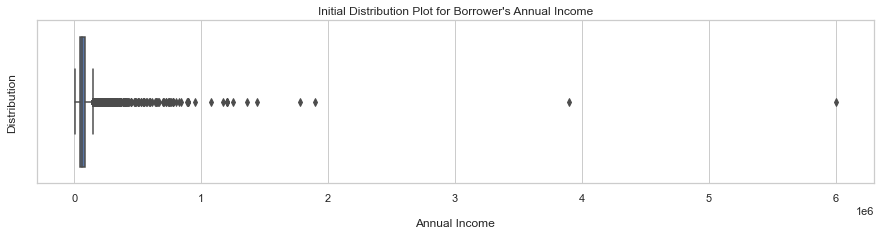

In [38]:
# 2.10 Identify and remove Outliers for column 'annual_inc'

print(loan_data.annual_inc.describe())
print('\n')


plt.figure(figsize=(15, 3))
plt.title("Initial Distribution Plot for Borrower's Annual Income")
sns.boxplot(x = 'annual_inc', data = loan_data)
plt.xlabel('Annual Income', labelpad = 15)
plt.ylabel('Distribution', labelpad = 10)

plt.plot()

Observations:

1. The annual income reported by the borrowers range from min of 4,000 to max of 6,000,000.
2. The median annual income is around 60,000
3. Most people have an annual income less than 115000
4. The above box plot shows that there is a high amount of outliers present.

Conclusion: Let's keep the annual income that is within +3 to -3 standard deviations to get rid of outliers (Nelson rule).

count    36278.0000
mean     66376.4811
std      35725.9562
min       4000.0000
25%      41500.0000
50%      60000.0000
75%      82000.0000
max     259000.0000
Name: annual_inc, dtype: float64




[]

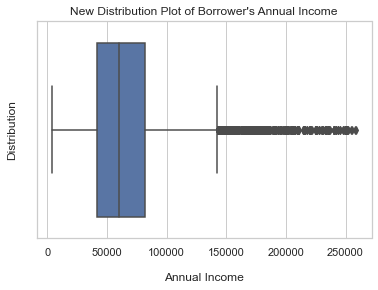

In [39]:
# Removing the outliers for annual_inc column

loan_data = loan_data[np.abs(loan_data.annual_inc-loan_data.annual_inc.mean()) <= (3*loan_data.annual_inc.std())]
print(loan_data.annual_inc.describe())

print('\n')

plt.title("New Distribution Plot of Borrower's Annual Income")
sns.boxplot(x = 'annual_inc', data = loan_data)
plt.xlabel('Annual Income', labelpad = 15)
plt.ylabel('Distribution', labelpad = 10)

plt.plot()


In [40]:
loan_data.shape

(36278, 22)

#### This completes the data cleaning step and dataset is ready for analysis.




## Credit Risk Analysis

The objective of the analysis is to identify the risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. LC wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of the loan default.  The LC can utilise this knowledge for its portfolio and risk assessment. 


In [41]:
## Key column for analysis - 'loan_status'
loan_data.loan_status.value_counts()

Fully Paid     30228
Charged Off     4993
Current         1057
Name: loan_status, dtype: int64

We need to compare the features between the Fully paid and charged off loans only as Current loans will not help for the analysis. Let's keep the loans with status "Fully Paid" or "Charged Off."

In [42]:
loan_data = loan_data[loan_data['loan_status'].isin(['Fully Paid','Charged Off'])]
loan_data.shape

(35221, 22)

## Step-3. Univariate and Segmented Univariate Analysis

### Univariate Analysis: Unordered Categorical Variables

  Unordered Categorical Variables are:

    1. loan_status
    2. home_ownership
    3. purpose
    4. addr_state

Charged Off     4993
Fully Paid     30228
Name: loan_status, dtype: int64




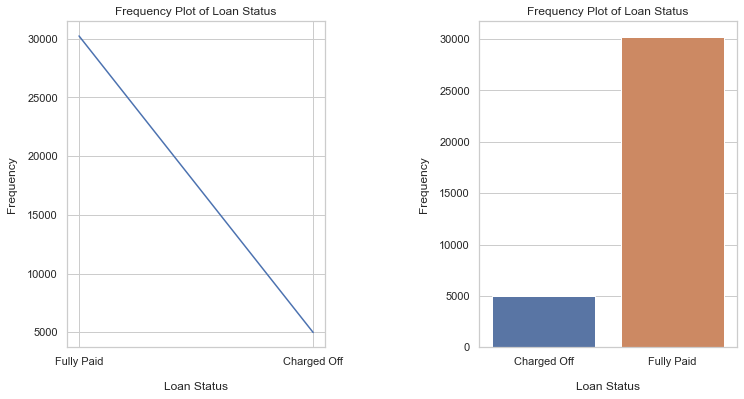

In [43]:
# 3.1 Rank-Frequency Plot of Unordered Categorical Variable: loan_status

series = loan_data.loan_status.value_counts(dropna = False)

print(series.sort_index())
print('\n')

plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)

plt.title('Frequency Plot of Loan Status')
sns.lineplot(data = series)
plt.xlabel('Loan Status', labelpad = 15)
plt.ylabel('Frequency', labelpad = 10)

plt.subplot(1, 2, 2)

plt.title('Frequency Plot of Loan Status')
sns.countplot(x = 'loan_status',  
              order = series.sort_index().index, 
              data = loan_data)
plt.xlabel('Loan Status', labelpad = 15)
plt.ylabel('Frequency', labelpad = 10)

plt.subplots_adjust(wspace = 0.6)
plt.show()

Let's identity the % of defaulted loans

In [44]:
print("Defaulted Loan Percentage %.2f" % (loan_data.loc[loan_data['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(loan_data)))


Defaulted Loan Percentage 14.18


MORTGAGE    15551
OTHER          95
OWN          2495
RENT        17080
Name: home_ownership, dtype: int64


loan_status  home_ownership
Charged Off  MORTGAGE           2064
             OTHER                18
             OWN                 349
             RENT               2562
Fully Paid   MORTGAGE          13487
             OTHER                77
             OWN                2146
             RENT              14518
Name: home_ownership, dtype: int64




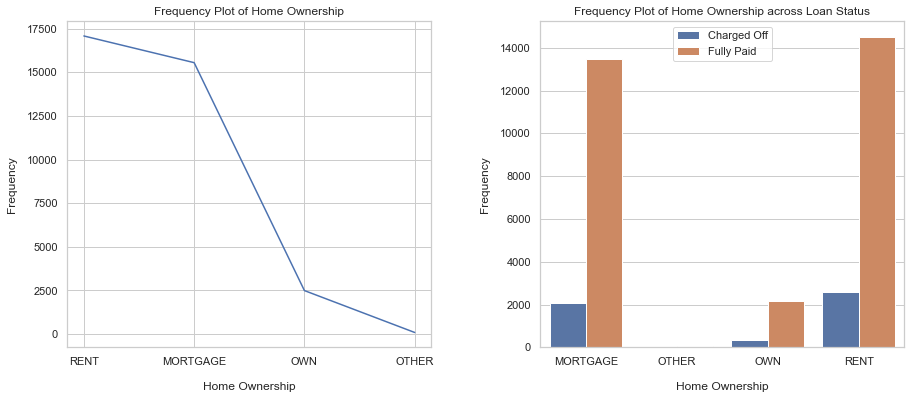

In [45]:
# 3.2 Rank-Frequency Plot of Unordered Categorical Variable: home_ownership

series = loan_data.home_ownership.value_counts(dropna = False)

print(series.sort_index())
print('\n')
print(loan_data.groupby(by = 'loan_status').home_ownership.value_counts(dropna = False).sort_index())
print('\n')

plotCategorical(data=loan_data, 
                plot_type='Unordered Categorical',
                series= series, 
                xlabel="Home Ownership", 
                ylabel= "Frequency", 
                x_axis='home_ownership')

#### Observation:

The initial analysis of 'home_ownership' variable shows that the frequency of charged off loans is high for RENT and MORTGAGE home ownership.

car                    1395
credit_card            4600
debt_consolidation    16857
educational             280
home_improvement       2565
house                   326
major_purchase         1967
medical                 618
moving                  520
other                  3461
renewable_energy         86
small_business         1347
vacation                333
wedding                 866
Name: purpose, dtype: int64


loan_status  purpose           
Charged Off  car                     150
             credit_card             479
             debt_consolidation     2532
             educational              47
             home_improvement        296
             house                    53
             major_purchase          193
             medical                  96
             moving                   78
             other                   554
             renewable_energy         16
             small_business          362
             vacation                 49
             

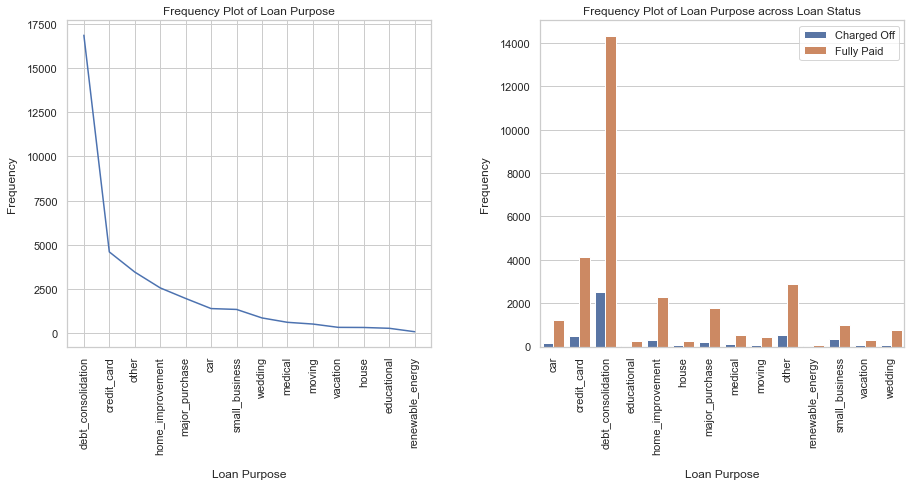

In [46]:
# 3.3 Rank-Frequency Plot of Unordered Categorical Variable: purpose

series = loan_data.purpose.value_counts(dropna = False)

print(series.sort_index())
print('\n')
print(loan_data.groupby(by = 'loan_status').purpose.value_counts(dropna = False).sort_index())
print('\n')

plotCategorical(data = loan_data,
                plot_type = 'Unordered Categorical',
                series = series,
                xlabel = "Loan Purpose",
                ylabel =  "Frequency", 
                x_axis = 'purpose', 
                legend = 'best', 
                xlabel_rotation = 90)

#### Observation:

The analysis of the 'purpose' variable shows that the highest loans are defaulted for the purpose of 'debt_consolidation' among the other purpose categories.

AK      72
AL     397
AR     217
AZ     755
CA    6376
CO     673
CT     645
DC     205
DE     106
FL    2520
GA    1248
HI     154
IA       1
ID       3
IL    1368
IN       1
KS     234
KY     294
LA     382
MA    1168
MD     944
MI     637
MN     556
MO     608
MS      18
MT      71
NC     672
NE       1
NH     146
NJ    1659
NM     161
NV     440
NY    3368
OH    1097
OK     271
OR     398
PA    1371
RI     183
SC     421
SD      56
TN      10
TX    2447
UT     228
VA    1256
VT      47
WA     716
WI     387
WV     158
WY      75
Name: addr_state, dtype: int64




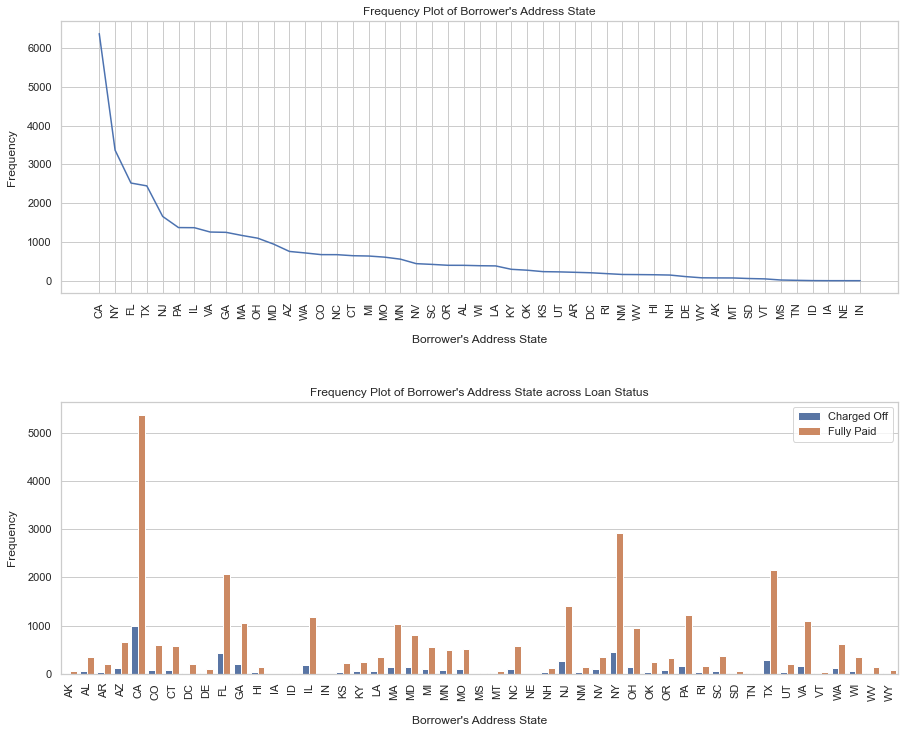

In [47]:
# 3.4 Rank-Frequency Plot of Unordered Categorical Variable: addr_state

series = loan_data.addr_state.value_counts(dropna = False)

print(series.sort_index())
print('\n')

plotCategorical(data = loan_data,
                plot_type = 'Unordered Categorical',
                series = series,
                xlabel = "Borrower's Address State",
                ylabel = "Frequency",
                x_axis = 'addr_state',
                legend = 'best',
                figsize_x = 15,
                figsize_y = 12,
                subplot_x = 2,
                subplot_y = 1,
                hspace = 0.4,
                wspace = 0,
                xlabel_rotation = 90)

#### Observation:

The distribution shows that the highest loan defaulted are from states CA, NY and FL.

## Univariate Analysis: Ordered Categorical Variables


Ordered Categorical Variables are:

    1. term
    2. grade
    3. sub_grade
    4. emp_length
    5. issue_yr

 36 months    26290
 60 months     8931
Name: term, dtype: int64


loan_status  term      
Charged Off   36 months     2774
              60 months     2219
Fully Paid    36 months    23516
              60 months     6712
Name: term, dtype: int64




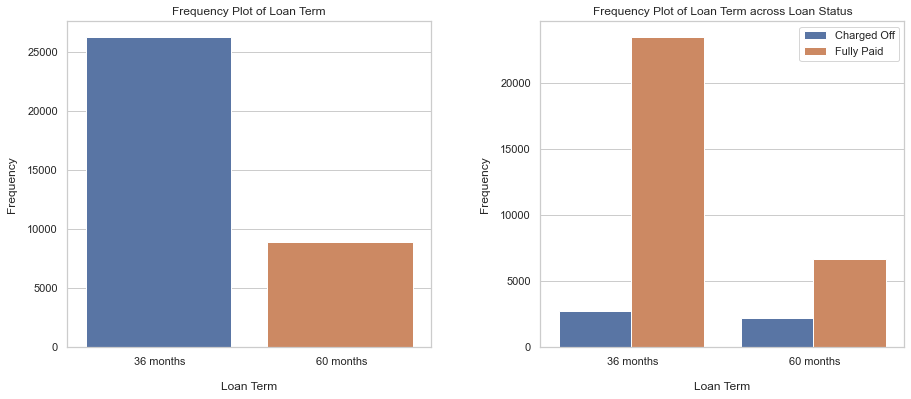

In [48]:
# 3.5 Rank-Frequency Plot of Ordered Categorical Variable: term

series = loan_data.term.value_counts(dropna = False)

print(series.sort_index())
print('\n')
print(loan_data.groupby(by = 'loan_status').term.value_counts(dropna = False).sort_index())
print('\n')

plotCategorical(data = loan_data,
                plot_type = 'Ordered Categorical',
                series = series,
                xlabel = "Loan Term",
                ylabel =  "Frequency", 
                x_axis = 'term', 
                legend = 'best')

#### Observation:

The distribution shows that the highest number of loan defaulters are for 36 months term.

A     9110
B    10666
C     7157
D     4658
E     2460
F      893
G      277
Name: grade, dtype: int64


loan_status  grade
Charged Off  A         519
             B        1261
             C        1188
             D         994
             E         651
             F         285
             G          95
Fully Paid   A        8591
             B        9405
             C        5969
             D        3664
             E        1809
             F         608
             G         182
Name: grade, dtype: int64




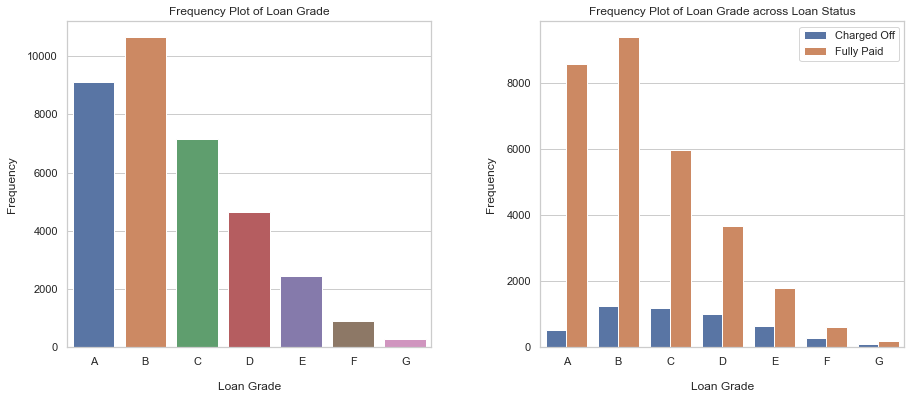

In [49]:
# 3.6 Rank-Frequency Plot of Ordered Categorical Variable: grade

series = loan_data.grade.value_counts(dropna = False)

print(series.sort_index())
print('\n')
print(loan_data.groupby(by = 'loan_status').grade.value_counts(dropna = False).sort_index())
print('\n')

plotCategorical(data = loan_data,
                plot_type = 'Ordered Categorical',
                series = series,
                xlabel = "Loan Grade",
                ylabel =  "Frequency", 
                x_axis = 'grade', 
                legend = 'best')

#### Observation:

The distribution shows that most of the loans charged off for the grades 'B', 'C' and 'D'

A1    1004
A2    1351
A3    1625
A4    2652
A5    2478
B1    1608
B2    1814
B3    2568
B4    2243
B5    2433
C1    1859
C2    1790
C3    1364
C4    1093
C5    1051
D1     849
D2    1182
D3    1020
D4     845
D5     762
E1     684
E2     565
E3     479
E4     392
E5     340
F1     289
F2     215
F3     156
F4     136
F5      97
G1      89
G2      73
G3      40
G4      51
G5      24
Name: sub_grade, dtype: int64




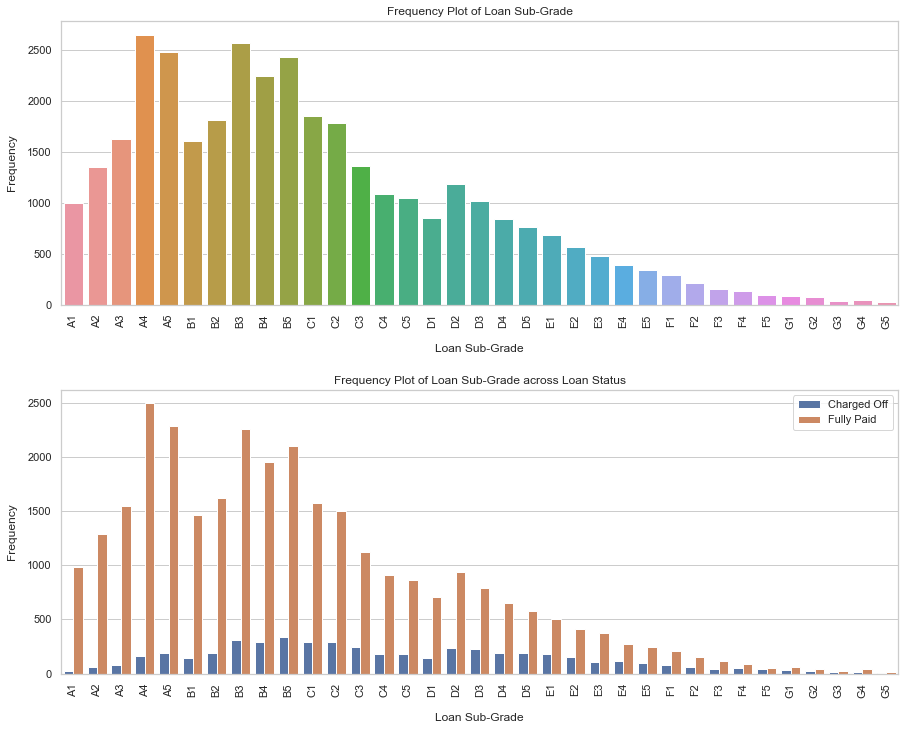

In [50]:
# 3.7 Rank-Frequency Plot of Ordered Categorical Variable: sub_grade

series = loan_data.sub_grade.value_counts(dropna = False)

print(series.sort_index())
print('\n')

plotCategorical(data = loan_data,
                plot_type = 'Ordered Categorical',
                series = series,
                xlabel = "Loan Sub-Grade",
                ylabel = "Frequency",
                x_axis = 'sub_grade',
                legend = 'best',
                figsize_x = 15,
                figsize_y = 12,
                subplot_x = 2,
                subplot_y = 1,
                hspace = 0.3,
                wspace = 0,
                xlabel_rotation = 90)

#### Observation:

The distribution shows that, of the Grade B, C and D, highest Charged off applicants belong to Sub Grades:
    
    1. Grade B => B3, B4, B5
    2. Grade C => C1, C2, C3
    3. Grade D => D2, D3, D5

0     3978
1     2955
2     4071
3     3818
4     3202
5     3038
6     2054
7     1630
8     1356
9     1173
10    7946
Name: emp_length_years, dtype: int64


loan_status  emp_length_years
Charged Off  0                    540
             1                    419
             2                    534
             3                    525
             4                    432
             5                    430
             6                    288
             7                    248
             8                    195
             9                    150
             10                  1232
Fully Paid   0                   3438
             1                   2536
             2                   3537
             3                   3293
             4                   2770
             5                   2608
             6                   1766
             7                   1382
             8                   1161
             9                   1023
            

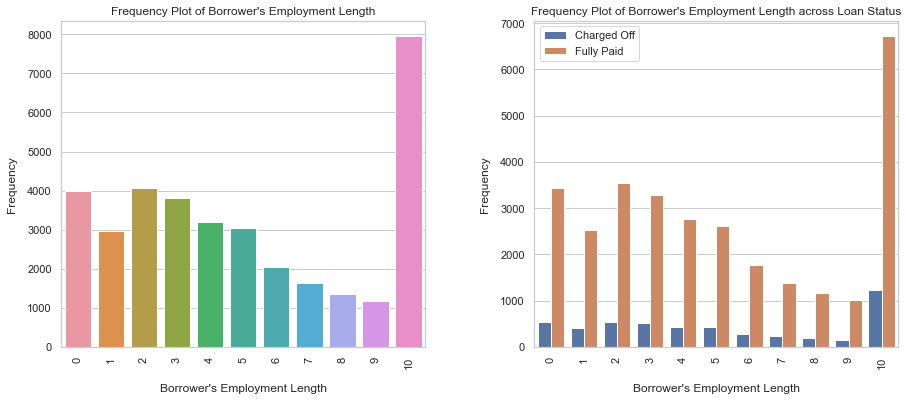

In [51]:
# 3.8 Rank-Frequency Plot of Ordered Categorical Variable: emp_length

series = loan_data.emp_length_years.value_counts()

print(series.sort_index())
print('\n')
print(loan_data.groupby(by = 'loan_status').emp_length_years.value_counts().sort_index())
print('\n')


plotCategorical(data = loan_data,
                plot_type = 'Ordered Categorical',
                series = series,
                xlabel = "Borrower's Employment Length",
                ylabel =  "Frequency", 
                x_axis = 'emp_length_years', 
                legend = 'best',
                xlabel_rotation = 90)

#### Observation:

The analysis shows that the most defaulted loan bowers has employment length as 10+ years

2007        6
2008     1059
2009     4412
2010    10743
2011    19001
Name: issue_d_year, dtype: int64


loan_status  issue_d_year
Charged Off  2007                2
             2008              163
             2009              552
             2010             1317
             2011             2959
Fully Paid   2007                4
             2008              896
             2009             3860
             2010             9426
             2011            16042
Name: issue_d_year, dtype: int64




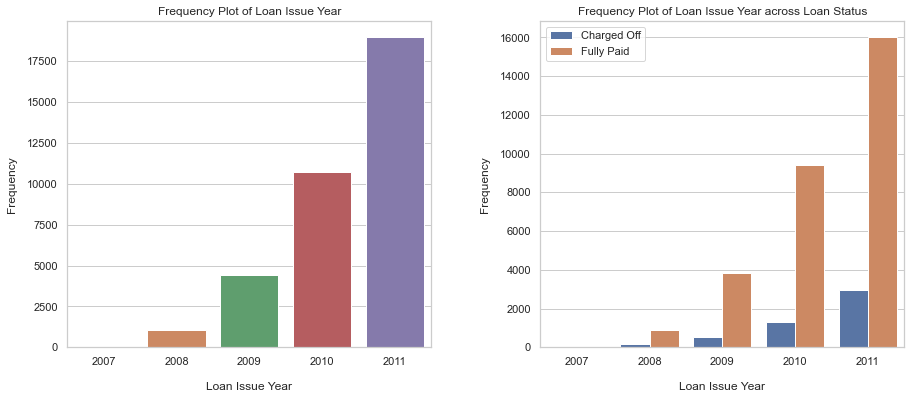

In [52]:
# 3.9 Rank-Frequency Plot of Ordered Categorical Variable: issue_yr

series = loan_data.issue_d_year.value_counts(dropna = False)

print(series.sort_index())
print('\n')
print(loan_data.groupby(by = 'loan_status').issue_d_year.value_counts(dropna = False).sort_index())
print('\n')

plotCategorical(data = loan_data,
                plot_type = 'Ordered Categorical',
                series = series,
                xlabel = "Loan Issue Year",
                ylabel =  "Frequency", 
                x_axis = 'issue_d_year', 
                legend = 'best')

#### Observation:
The distribution shows that loans issued in 2011 have the highest charged off loans.

## Univariate Analysis: Quantitative Variables

Quantitative or Continuous Variables are:

    1. funded_amnt
    2. int_rate_percent
    3. installment
    4. annual_inc
    5. dti

In [53]:
# Setting the order list as per the Loan Status
status_order_list = ['Charged Off', 'Fully Paid']

count   35221.0000
mean    10798.7479
std      7018.0803
min       500.0000
25%      5400.0000
50%      9600.0000
75%     15000.0000
max     35000.0000
Name: funded_amnt, dtype: float64


                 count       mean       std       min       25%        50%        75%        max
loan_status                                                                                     
Charged Off  4993.0000 11827.5035 7710.3750 1000.0000 5800.0000 10000.0000 16000.0000 35000.0000
Fully Paid  30228.0000 10628.8201 6882.4007  500.0000 5300.0000  9400.0000 14500.0000 35000.0000




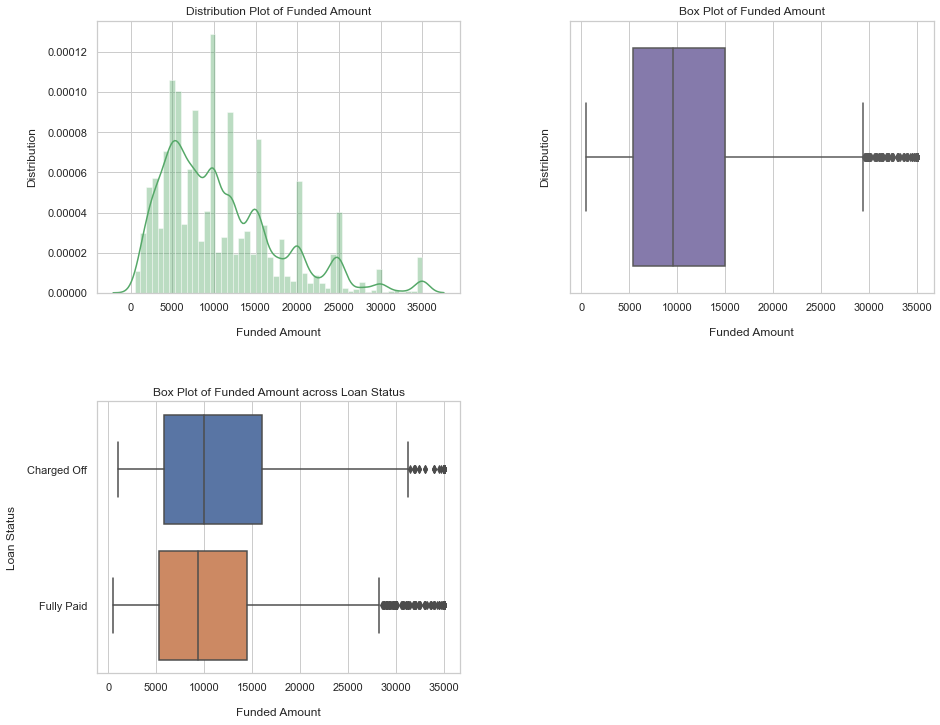

In [54]:
# 3.10 Distribution and Box Plots of Quantitative Variable: funded_amnt

print(loan_data.funded_amnt.describe())
print('\n')
print(loan_data.groupby(by = 'loan_status').funded_amnt.describe().sort_index())
print('\n')

plotContinuous(data = loan_data,
                plot_type = 'Quantitative',
                series = status_order_list,
                xlabel = "Funded Amount",
                ylabel =  "Distribution", 
                x_axis = 'funded_amnt')

#### Observations:

1. Overall, the applied loan amount distribution is slightly right-skewed with mean greater than the median. Most of the loans granted are below 15000 (75 percentile value)
2. Charged off loans are shifted towards higher average loan amount request.


count   35221.0000
mean       11.9793
std         3.6985
min         5.4200
25%         8.9400
50%        11.8300
75%        14.4600
max        24.4000
Name: int_rate_percent, dtype: float64


                 count    mean    std    min     25%     50%     75%     max
loan_status                                                                 
Charged Off  4993.0000 13.9268 3.6404 5.4200 11.4900 13.7900 16.4500 24.4000
Fully Paid  30228.0000 11.6576 3.6082 5.4200  8.5900 11.4900 14.0900 24.1100




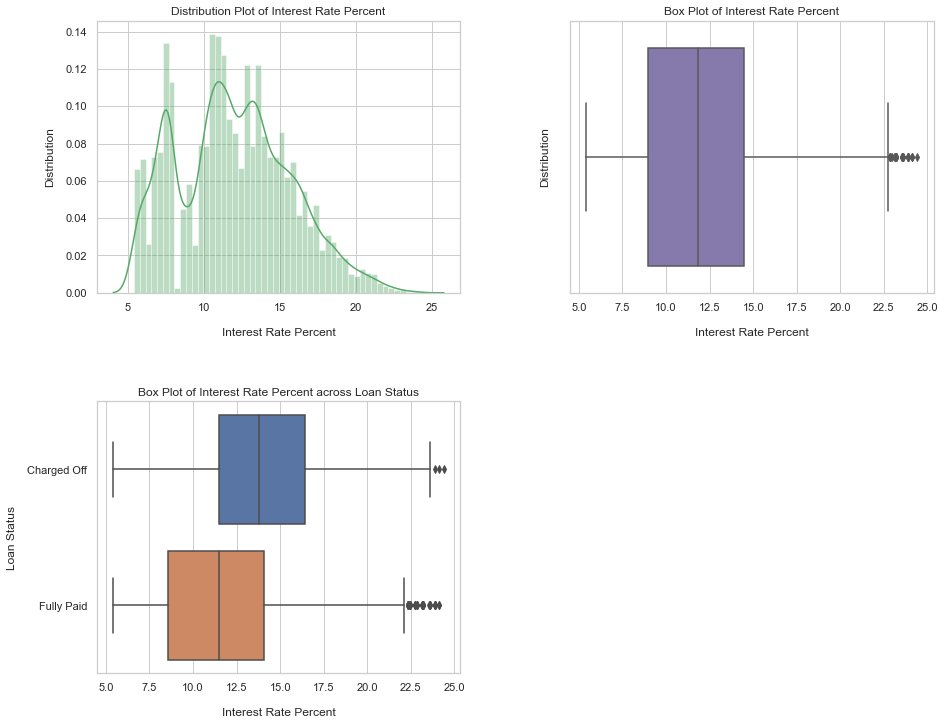

In [55]:
# 3.11 Distribution and Box Plots of Quantitative Variable: int_rate_percent

print(loan_data.int_rate_percent.describe())
print('\n')
print(loan_data.groupby(by = 'loan_status').int_rate_percent.describe())
print('\n')

plotContinuous(data = loan_data, 
                plot_type = 'Quantitative',
                series = status_order_list,
                xlabel = "Interest Rate Percent",
                ylabel =  "Distribution",
                x_axis = 'int_rate_percent')

Observations:

1. Overall, the interest rate varies from 5.42% to 24.4% with an average interest rate of 11.8%.
2. The interest rate for Charged Off loans appear to be higher than for Fully paid. This is expected as the risk increases and the rate of interest imposed on the loan also increases.

count   35221.0000
mean      321.9755
std       205.3597
min        16.0800
25%       167.3800
50%       279.1600
75%       424.0600
max      1305.1900
Name: installment, dtype: float64


                 count     mean      std     min      25%      50%      75%       max
loan_status                                                                          
Charged Off  4993.0000 336.1748 213.3655 22.7900 171.4300 296.7200 455.6300 1305.1900
Fully Paid  30228.0000 319.6301 203.9156 16.0800 166.6175 276.9000 418.9150 1288.1000




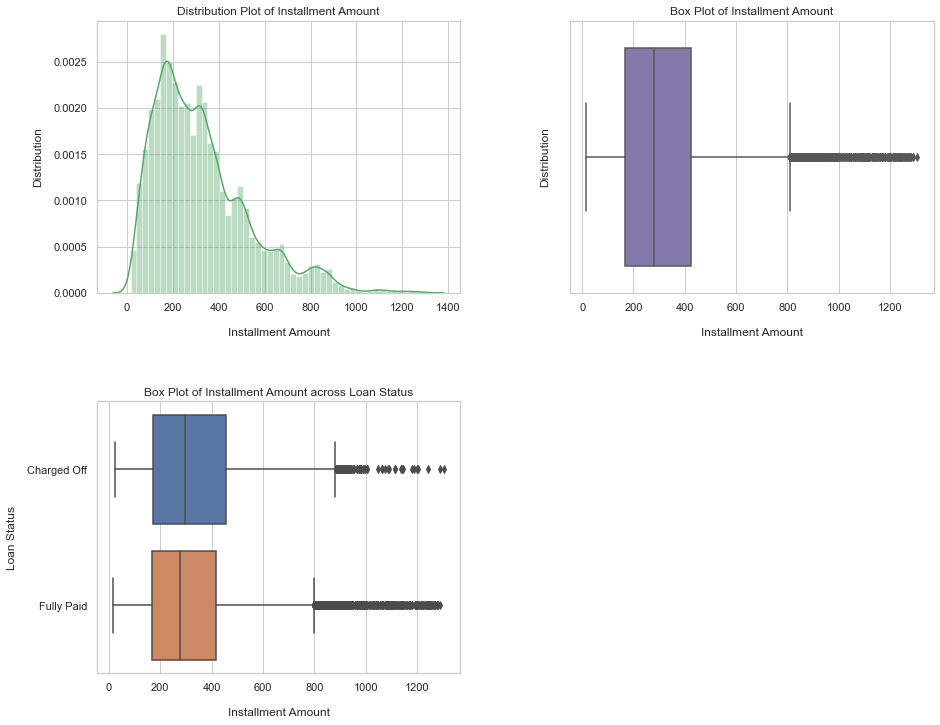

In [56]:
# 3.12 Distribution and Box Plots of Quantitative Variable: installment

print(loan_data.installment.describe())
print('\n')
print(loan_data.groupby(by = 'loan_status').installment.describe())
print('\n')

plotContinuous(data = loan_data, 
                plot_type = 'Quantitative',
                series = status_order_list,
                xlabel = "Installment Amount",
                ylabel =  "Distribution",
                x_axis = 'installment')

#### Observations:
1. The Charged Off loan Applicants has a central tendency of installment amount as 296.72 with minimum 25th percentile
value as 171.43 and maximum 75th percentile value as 455.63.
2. The Charged Off loans have high installment on an average.

count    35221.0000
mean     66153.7565
std      35657.6370
min       4000.0000
25%      41000.0000
50%      59004.0000
75%      81600.0000
max     259000.0000
Name: annual_inc, dtype: float64


                 count       mean        std       min        25%        50%        75%         max
loan_status                                                                                        
Charged Off  4993.0000 60681.8622 33296.8313 4080.0000 38004.0000 54000.0000 75000.0000 254616.0000
Fully Paid  30228.0000 67057.5930 35953.1757 4000.0000 42000.0000 60000.0000 83004.0000 259000.0000




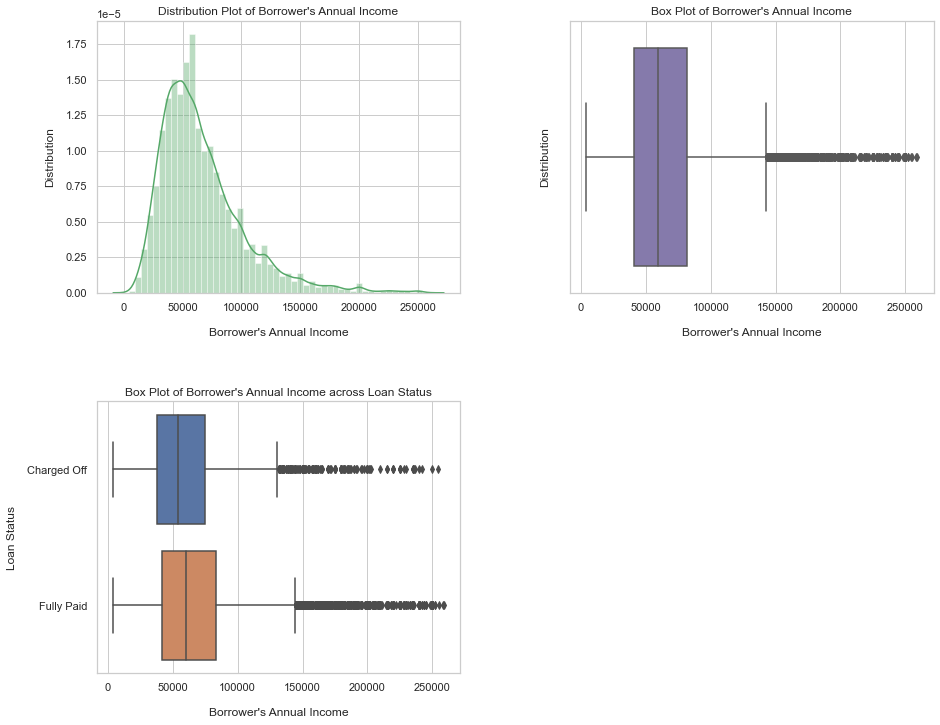

In [57]:
# 3.13 Distribution and Box Plots of Quantitative Variable: annual_inc

print(loan_data.annual_inc.describe())
print('\n')
print(loan_data.groupby(by = 'loan_status').annual_inc.describe())
print('\n')

plotContinuous(data = loan_data, 
                plot_type = 'Quantitative',
                series = status_order_list,
                xlabel = "Borrower's Annual Income",
                ylabel =  "Distribution",
                x_axis = 'annual_inc')

#### Observation:

The Charged Off loan applicants have a central tendency of annual income as 54000.00 with minimum 25th percentile value as 4080.00 and maximum 75th percentile value as 75000.00.

count   35221.0000
mean       13.4455
std         6.6239
min         0.0000
25%         8.3700
50%        13.5500
75%        18.6800
max        29.9900
Name: dti, dtype: float64


                 count    mean    std    min    25%     50%     75%     max
loan_status                                                                
Charged Off  4993.0000 14.1622 6.5166 0.0000 9.3500 14.4400 19.3400 29.8500
Fully Paid  30228.0000 13.3271 6.6342 0.0000 8.2200 13.4000 18.5600 29.9900




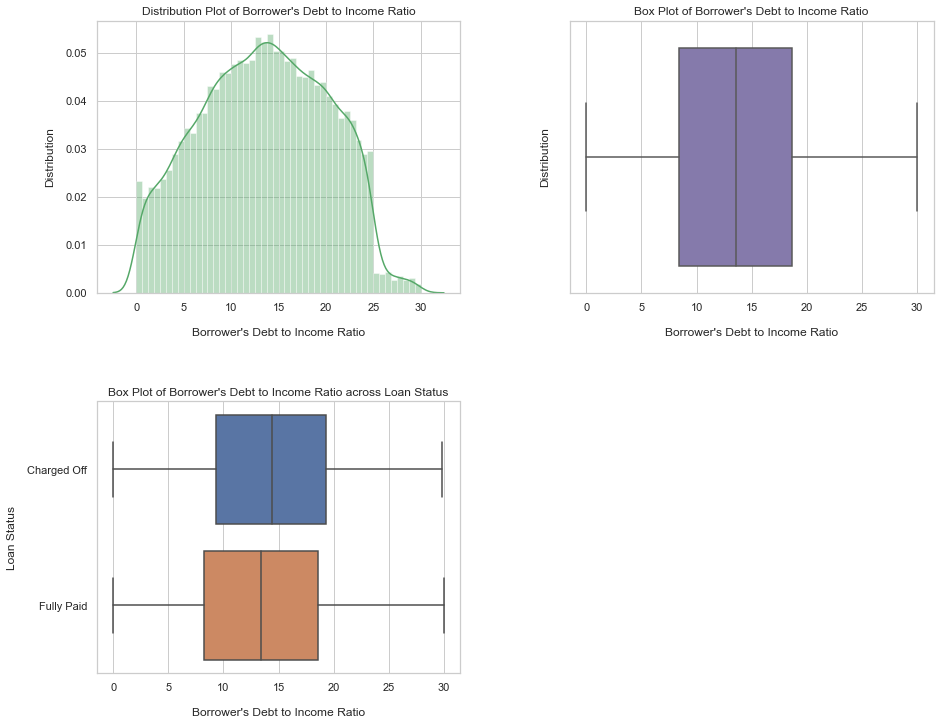

In [58]:
# 4.14 Distribution and Box Plots of Quantitative Variable: dti

print(loan_data.dti.describe())
print('\n')
print(loan_data.groupby(by = 'loan_status').dti.describe())
print('\n')

plotContinuous(data = loan_data, 
                plot_type = 'Quantitative',
                series = status_order_list,
                xlabel = "Borrower's Debt to Income Ratio",
                ylabel =  "Distribution",
                x_axis = 'dti')

#### Observation:
The Charged Off loan applicants has a central tendency of dti ratio as 14.44 with minimum 25th percentile value as 9.34 and maximum 75th percentile value as 19.35.

## Step-4. Bivariate Analysis

### Bivariate Analysis: Categorical Variables

Following Categorical Variables are considered for bivariate analysis against the percentages charged off loans

1. home_ownership
2. purpose
3. addr_state
4. term
5. grade
6. sub_grade
7. emp_length
8. issue_yr
9. funded_amnt
10. int_rate_percent
11. annual_inc
12. installment
13. dti

<AxesSubplot:xlabel='home_ownership', ylabel='% of loans Charged Off'>

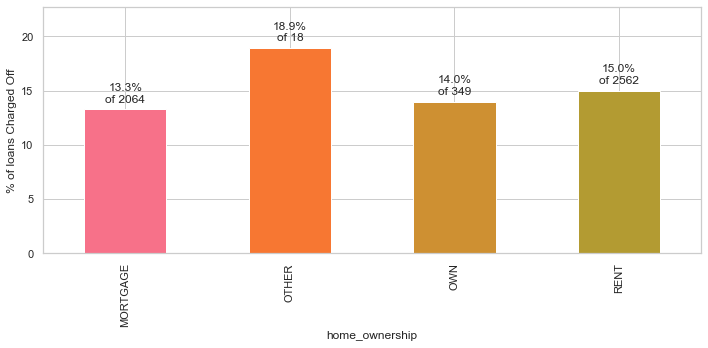

In [59]:
# 4.1 Categorical bivariable Analysis: home_ownership against Charged Off Percentage Rate

plt.figure(figsize=(10, 5))
plotByLoanStatus(loan_data, 'home_ownership')


#### Observation:

There is no substantial impact of home_ownership on the charged off loans.

<AxesSubplot:xlabel='purpose', ylabel='% of loans Charged Off'>

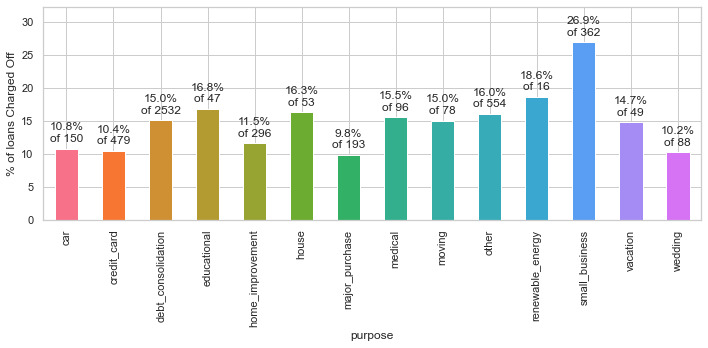

In [60]:
# 4.2 Categorical bivariable Analysis: purpose against Charged Off Percentage Rate

plt.figure(figsize=(10, 5))
plotByLoanStatus(loan_data, 'purpose')

#### Observations:

1. 26% of loans for small businesses are Charged Off. Making them the most risky purpose.
2. Approximately ~49% of the loans are issued for the purpose of debt consolidation.
3. 17% of the loans for renewable_enrgy are charged Off, but the number is too less to be of significance.

<AxesSubplot:xlabel='addr_state', ylabel='% of loans Charged Off'>

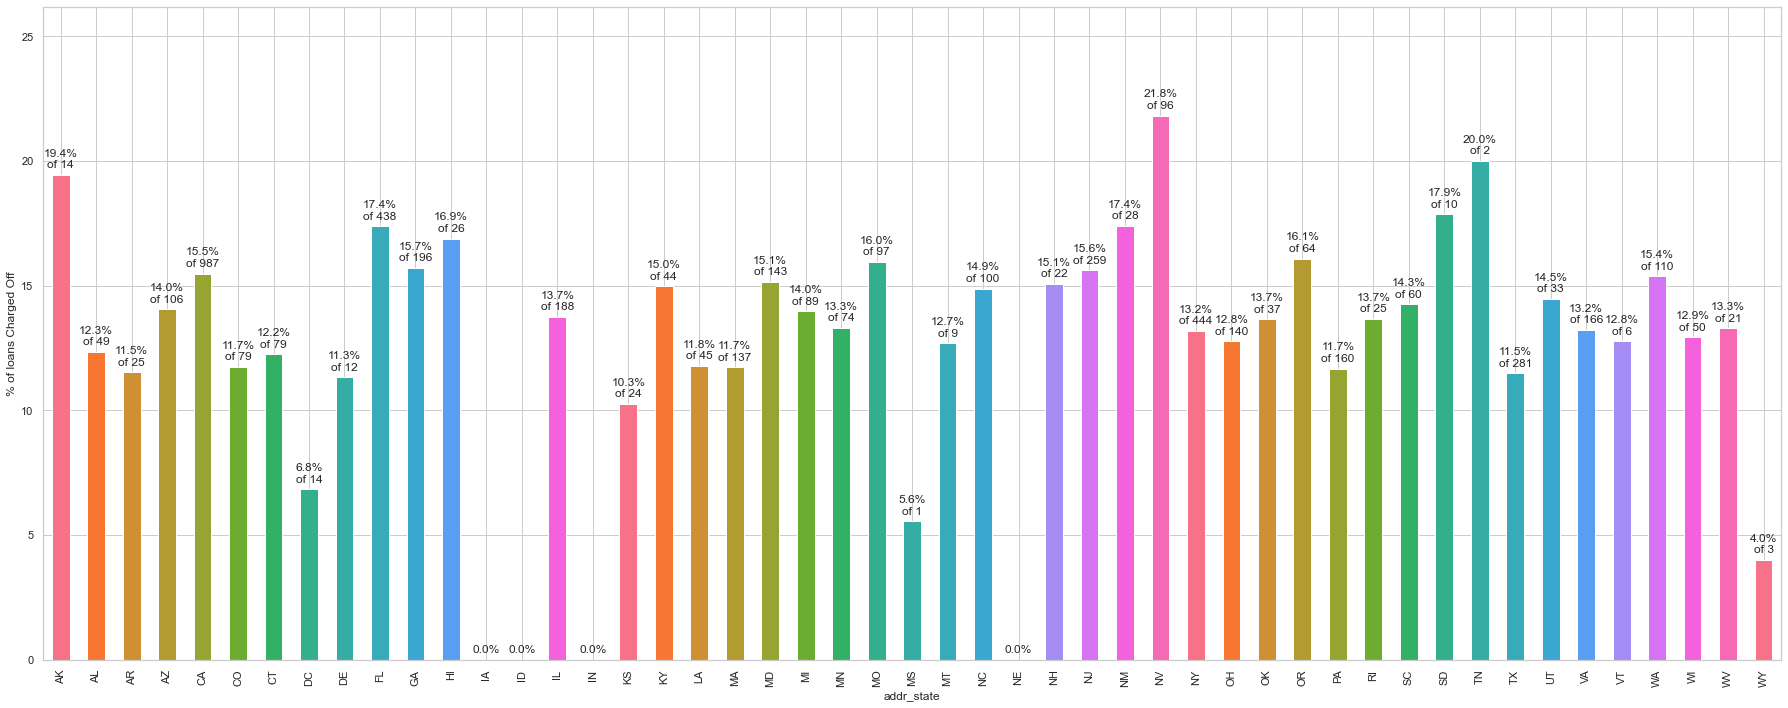

In [61]:
# 4.3 Categorical bivariate Analysis: addr_state against Charged Off Percentage Rate

plt.figure(figsize=(25, 10))
plotByLoanStatus(loan_data, 'addr_state')

<AxesSubplot:xlabel='addr_state', ylabel='count'>

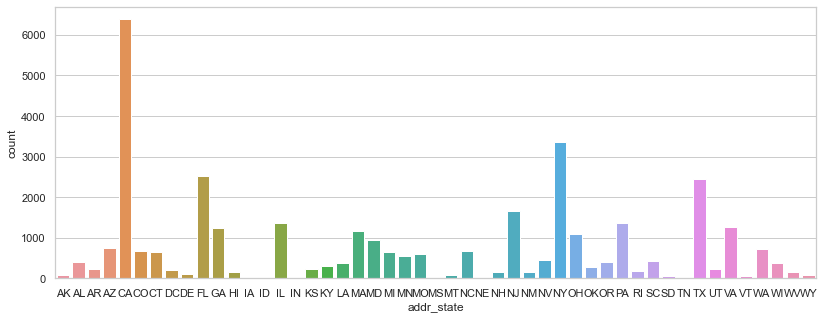

In [62]:
plt.figure(figsize=(30,5))
plt.subplot(1, 2, 1)
sns.countplot(loan_data['addr_state'], order=sorted(loan_data.addr_state.unique()))

#### Observations:

1. Maximum loans are from California state followed by New york, Florida and Texas state.
2. States with higher Charge Off rates have very low numbers of loans. The percentage is therefore NOT significant and should be ignored. Overall, this variable has no impact on loan defaulting.

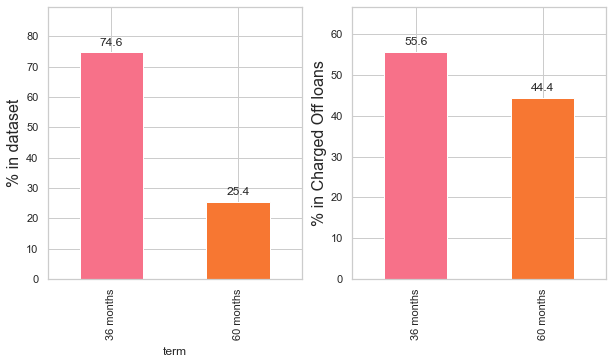

In [63]:
# 4.4 Categorical Variable Analysis: term against Charged Off Percentage Rate
plt.figure(figsize=(10,5))
plotByPercentages(loan_data, 'term')

#### Observation:

1. Among Charged Off loans, percentage of term 60 months rises to 45% as compred to total dataset. 
2. The higher term loans have a higher chances of default.

<AxesSubplot:xlabel='grade', ylabel='% of loans Charged Off'>

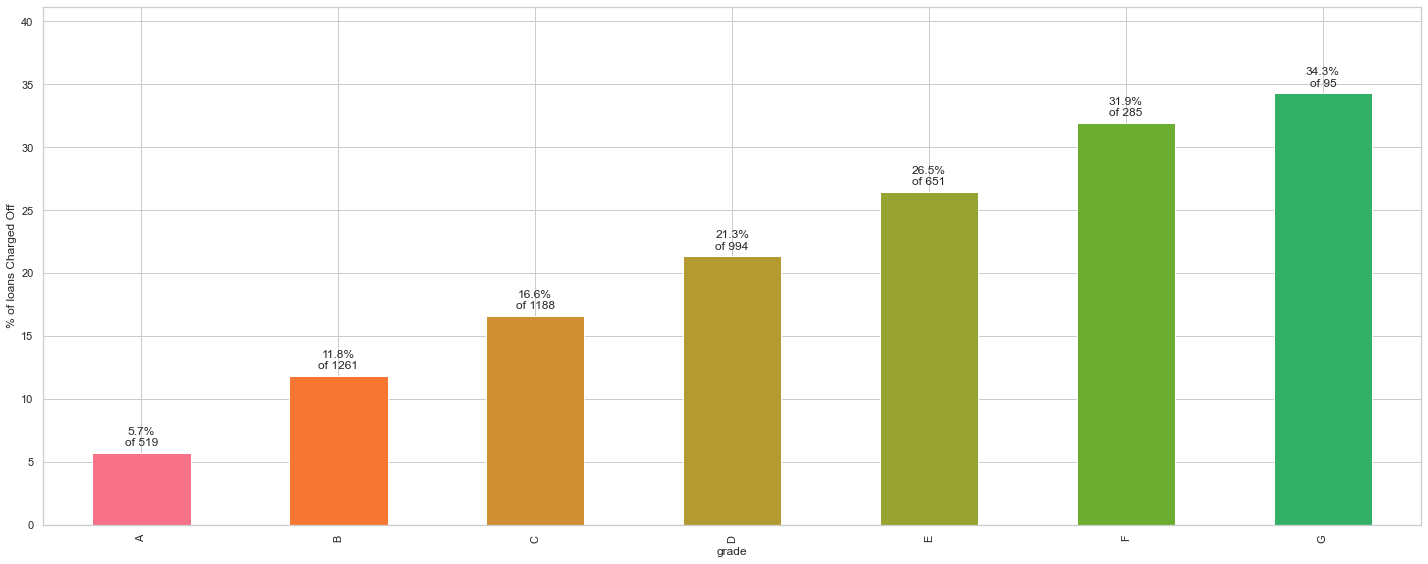

In [64]:
# 4.5 Categorical Variable Analysis: grade against Charged Off Percentage Rate
plt.figure(figsize=(20, 8))
plotByLoanStatus(loan_data, 'grade')

#### Observations :

1. Nearly 30% of loans in Grades F and G see a default.
2. Loans Grade E onwards have a tendency to be charged off more.

<AxesSubplot:xlabel='sub_grade', ylabel='% of loans Charged Off'>

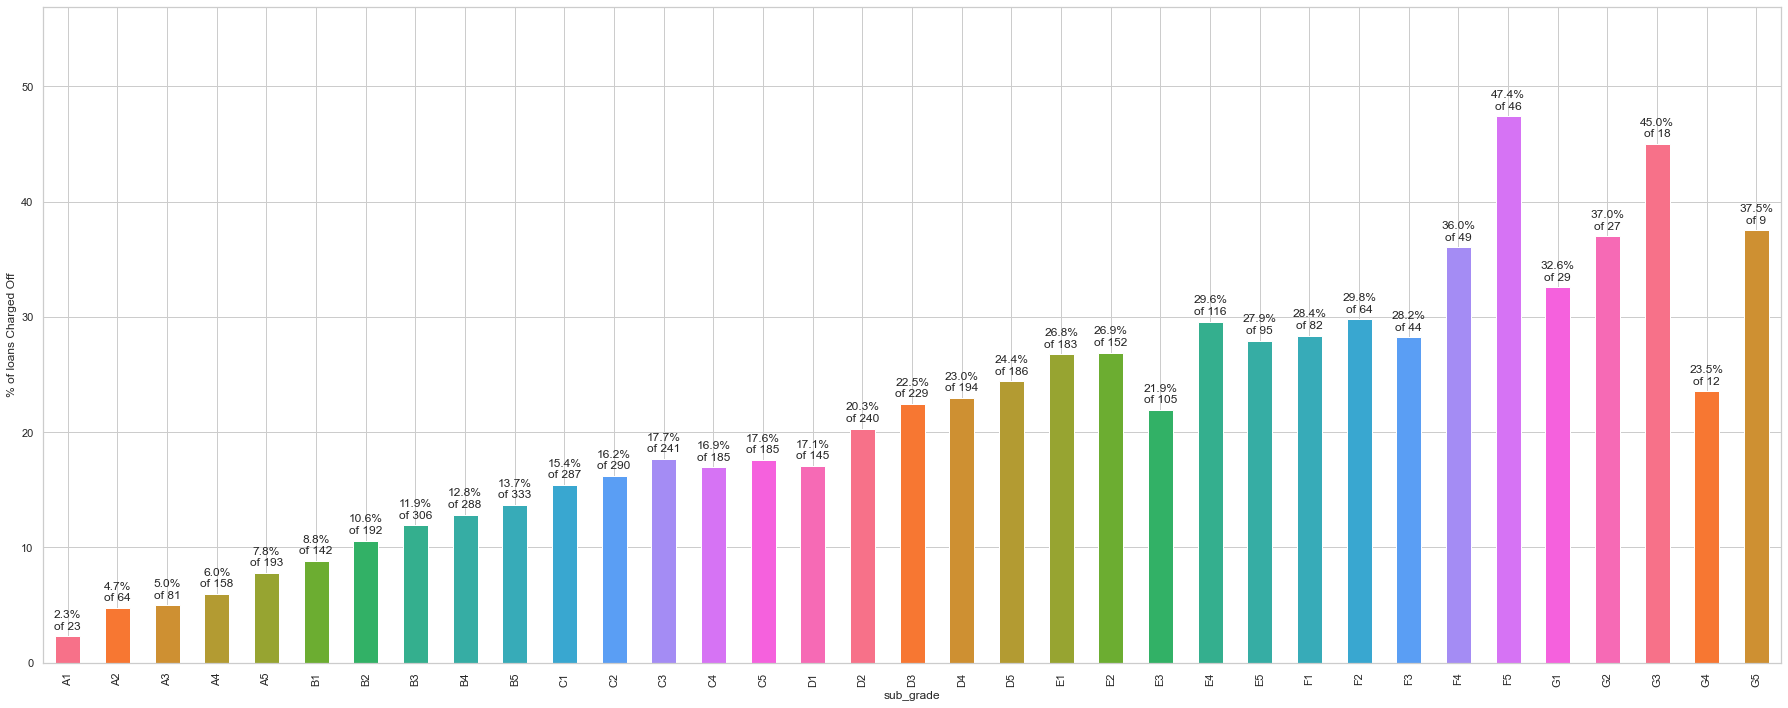

In [65]:
# 4.6 Categorical Variable Analysis: sub_grade against Charged Off Percentage Rate

plt.figure(figsize=(25, 10))
plotByLoanStatus(loan_data, 'sub_grade')

#### Observation:
As the grade and subgrade increased the percentage of loans charged off also increased.

<AxesSubplot:xlabel='emp_length_years', ylabel='% of loans Charged Off'>

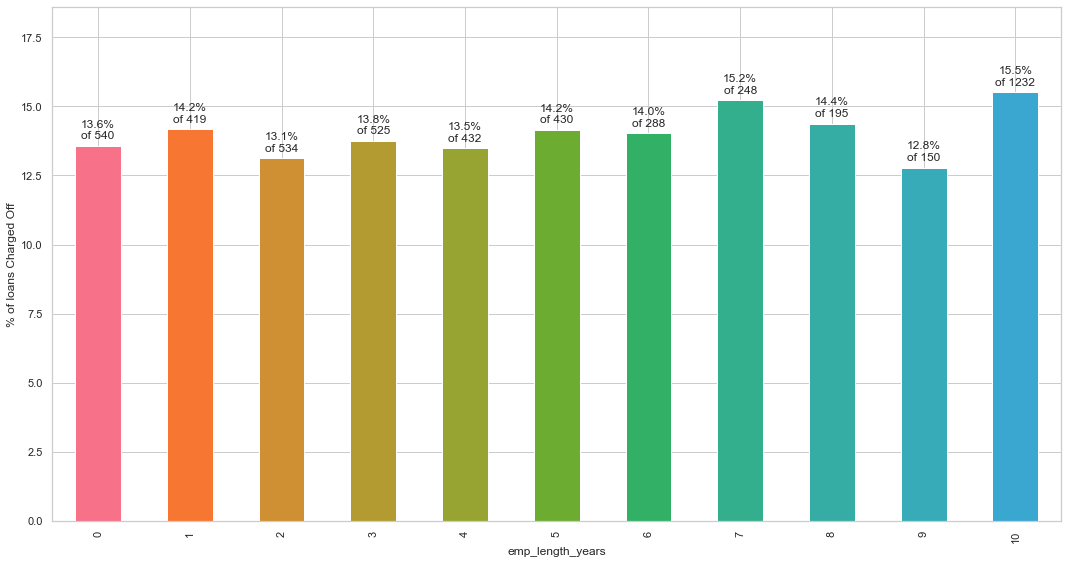

In [66]:
# 4.7 Categorical Variable Analysis: emp_length_years against Charged Off Percentage Rate

plt.figure(figsize=(15, 8))
plotByLoanStatus(loan_data, 'emp_length_years')

#### Observation:

1. 15.5% of loans charged off for the applicants with 10 years or more employment length.

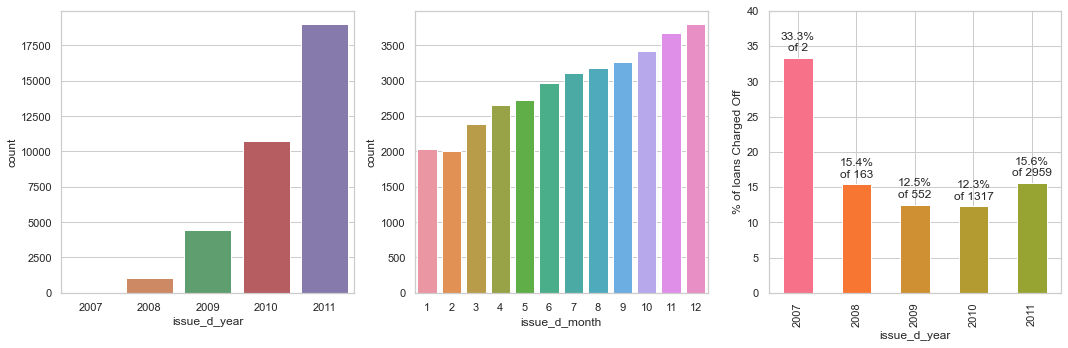

In [67]:
# 4.8 Categorical Variable Analysis: issue_d_year and issue_d_month against Charged Off Percentage Rate

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.countplot(loan_data['issue_d_year'], order=sorted(loan_data.issue_d_year.unique()))

plt.subplot(1, 3, 2)
sns.countplot(loan_data['issue_d_month'], order=sorted(loan_data.issue_d_month.unique()))

#Percentage of loans charged off and fully Paid
plt.subplot(1, 3, 3)
plotByLoanStatus(loan_data, 'issue_d_year')

plt.show()

#### Observations:

1. Over the years, LC has given more loans. From 2007 to 2011 the loans issued have significantly increased.
2. The number of loans issued increases from Jan to Dec. In the month of December the maximum  number of loans were issued.
3. Year of loan has no significant impact on loans being charged off.


<AxesSubplot:xlabel='funded_amnt_bin', ylabel='% of loans Charged Off'>

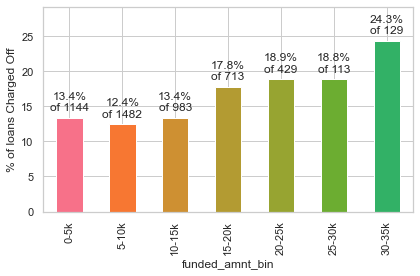

In [68]:
# 4.9 Categorical Variable Analysis: funded_amnt against Charged Off Percentage Rate

# Funded loan amount has values ranging from 0 to 35000. 
# Create a derived categorical variable using 5000 as bucket size.
loan_data['funded_amnt_bin'] = pd.cut(loan_data['funded_amnt'], 
                                      [x for x in range(0, 36000, 5000)],
                                      labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

plotByLoanStatus(loan_data, 'funded_amnt_bin')


#### Observations:
   
1. The % of charged off loans increases substantially as the funded loan amount increases.
2. The majority of loans are below 20000.
3. It shows that higher the funded loan amount higher risk of the default.

<AxesSubplot:xlabel='interest_rate_buckets', ylabel='% of loans Charged Off'>

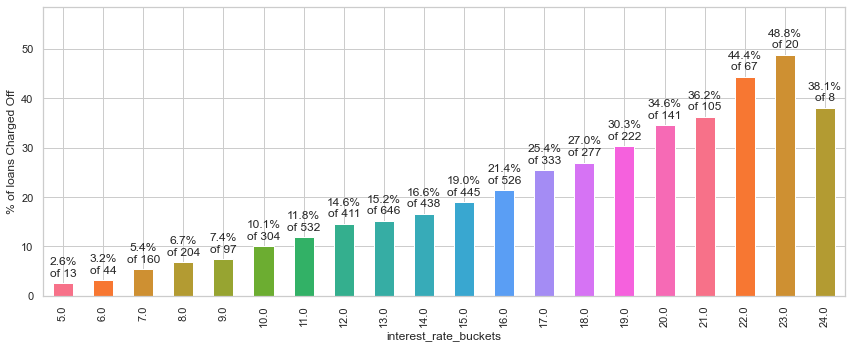

In [69]:
# 4.10 Categorical Variable Analysis: int_rate_percent against Charged Off Percentage Rate

# Interest Rate has lots of small values ranging from 5% to 25%. 
# Create a derived categorical variable using 1 unit as bucket size.

loan_data['interest_rate_buckets'] = round(loan_data['int_rate_percent'])

plt.figure(figsize=(12,5))
plotByLoanStatus(loan_data, 'interest_rate_buckets')



#### Observations:
1. As the interest rate increases the Percentage of charged off loans also increases.

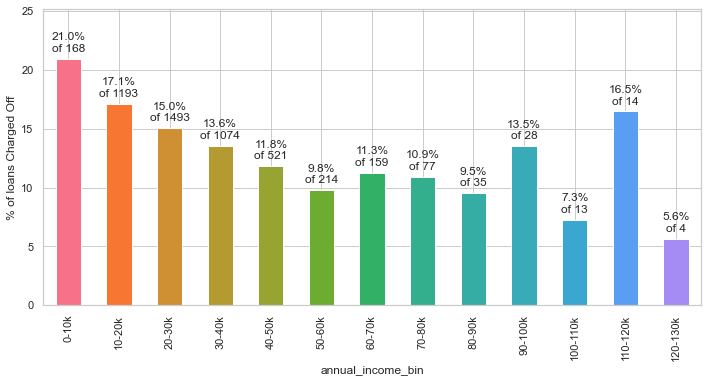

In [70]:
# 4.11 Categorical Variable Analysis: annual_inc against Charged Off Percentage Rate

# Borrower's Annual Income has values ranging from 4000 to 234996.
# Create a derived categorical variable using 10000 as bin size.

loan_data['annual_income_bin'] = loan_data['annual_inc']/20000
loan_data['annual_income_bin'] = loan_data['annual_income_bin'].astype(int)


plt.figure(figsize=(10,5))
ax = plotByLoanStatus(loan_data.loc[loan_data['annual_income_bin']<21], 'annual_income_bin')
ax.set_xticklabels([(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') for x in ax.get_xticklabels()])
plt.show()


#### Observations:
1. Loan defaults are higher for lower income and progressively reduce as incomes go up.

<AxesSubplot:xlabel='installment_bin', ylabel='% of loans Charged Off'>

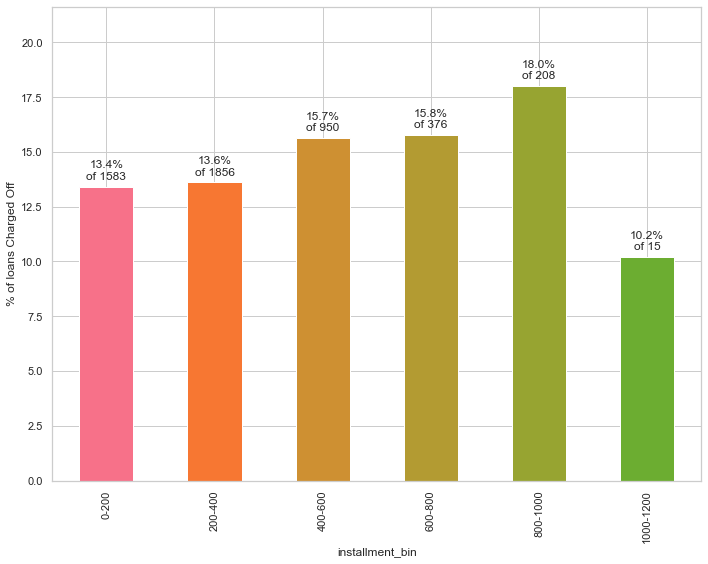

In [71]:
# The 4.12 Categorical Variable Analysis: installment against Charged Off Percentage Rate

# Borrower's Installment has values ranging from 16 to 1400.
# Create a derived categorical variable using 200 as bin size.

loan_data['installment_bin'] = pd.cut(loan_data['installment'], 
                                      [x for x in range(0, 1400, 200)], labels=[str(x)+'-'+str(x+200) for x in range (0, 1200, 200)])

plt.figure(figsize=(10,8))
plotByLoanStatus(loan_data, 'installment_bin')


#### Observations:

1. The installment amount increases as the percentage charged off loan increases.

<AxesSubplot:xlabel='dti_bin', ylabel='% of loans Charged Off'>

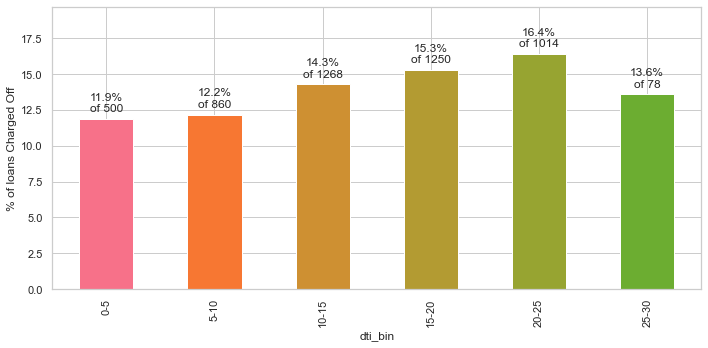

In [72]:
# 4.13 Categorical Variable Analysis: dti against Charged Off Percentage Rate

# The borrower's Debt-to-Income Ratio has values ranging from 0 to 30.
# Create a derived categorical variable using 200 as bin size.

loan_data['dti_bin'] = pd.cut(loan_data['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

plt.figure(figsize=(10,5))
plotByLoanStatus(loan_data, 'dti_bin')


#### Observations:

1. When the dti ratio is higher than 15, higher percentage of loans are Charged Off
2. Higher the dti ratio higher will be the chances of loan getting defaulted

<AxesSubplot:xlabel='loan_amt_to_ann_inc_ratio_bin', ylabel='% of loans Charged Off'>

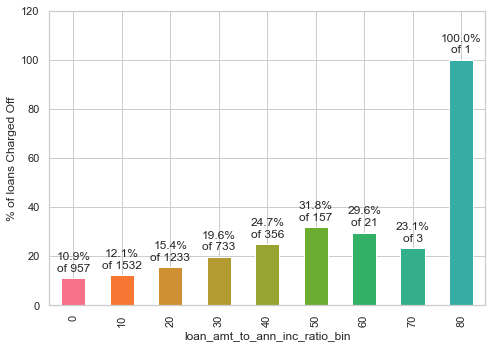

In [73]:
# 4.14 Derived variable - ratio of loan amount to annual income

loan_data['loan_amt_to_ann_inc_ratio'] = loan_data['loan_amnt'] * 10 / loan_data['annual_inc']

loan_data['loan_amt_to_ann_inc_ratio_bin'] = (loan_data['loan_amt_to_ann_inc_ratio'].astype(int)) * 10
plt.figure(figsize=(7,5))
plotByLoanStatus(loan_data, 'loan_amt_to_ann_inc_ratio_bin')


#### Observations:

1. As long as the loan amount is less than 20% of annual income, defaults are low.
2. Loan amounts of 30% of annual income or higher see a high rate of default.

### Bivariate Analysis: Continuous Variables

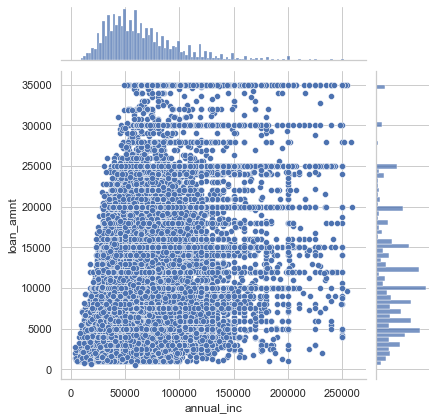

In [74]:
# 4.15 Continuous Variable Analysis: funded loan amount and annual_inc

sns.jointplot('annual_inc', 'loan_amnt', loan_data.loc[loan_data['annual_inc']<260000])
plt.show()

#### Observation:

1. The borrowers with average income lower than 50000 taking loans of 25000 or higher. This could lead to charged off loans.

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

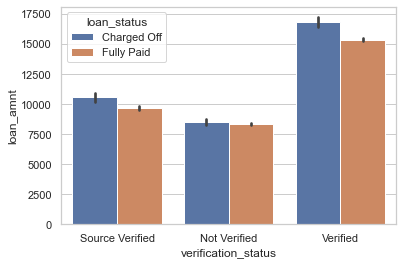

In [75]:
# 4.16 Continuous Variable Analysis: loan amount vs verification_status vs loan status

sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan_data, estimator=np.mean)

#### Observations:

1. Higher loan amounts are Verified more often.
2. The higher amount loans have a higher default rate.
3. The higher loan amounts are verified more often by Lending Club.

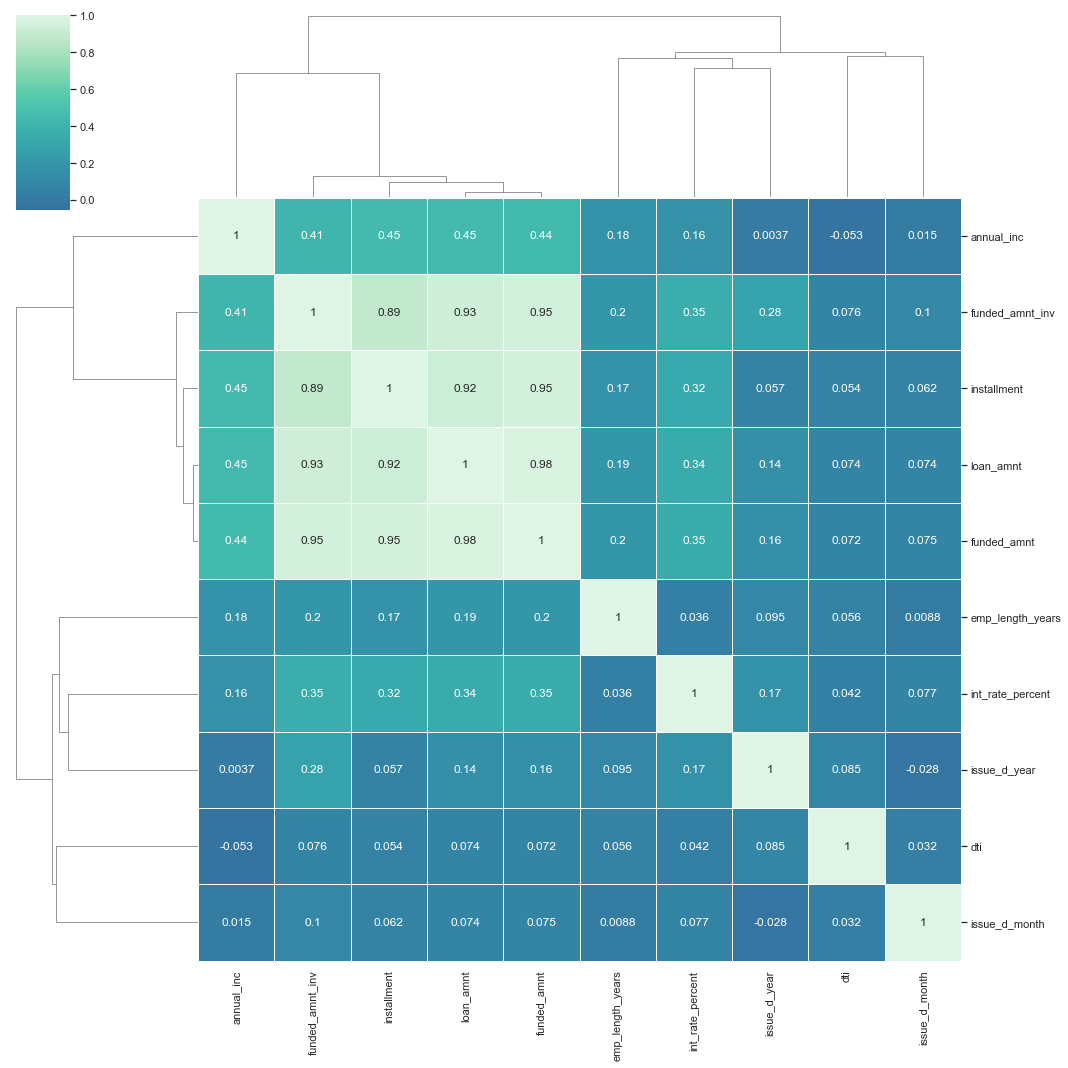

In [76]:
# 4.17 Correlation of Charged Off loan_status

# Drop the additional columns created during analysis
columns_tobe_dropped = ['pub_rec_bankruptcies', 'annual_income_bin',
                        'loan_amt_to_ann_inc_ratio', 'loan_amt_to_ann_inc_ratio_bin', 'interest_rate_buckets']
loan_data= loan_data.drop(columns_tobe_dropped,axis=1)

charged_off_loan = loan_data[loan_data.loan_status == 'Charged Off'].corr()

charged_off_loan.dropna(axis = 1, how = 'all', inplace = True)

kwargs = {'annot': True}

sns.clustermap(charged_off_loan, center = 0, cmap = 'mako', linewidths = 0.75, figsize = (15, 15), **kwargs)
plt.show()

#### Observations:

1. installment, funded_amnt, loan_amnt and funded_amnt_inv are highly correlated to each other. They form a cluster.
2. dti (Debt-to-Income Ratio) is negatively correlated to annual_inc.

## Conclusion

As per EDA below variables are identified that result in the loan defaulters.

1. Annual Income - Borrowers with lower income range may result in loan defaulters.
2. Employment Length - Borrowers with employment tenure as 10 years or more have resulted in more charged off loans. Additional data needs to be sourced and analysed to identify the reasoning.
3. Loan Purpose - Loans for 'small business' and 'debt consolidation' purposes have resulted in a high number of charged off loans.
4. Address State - Borrowers from specific states such as 'California', 'New york', 'Florida' and 'Texas' states are defaulted more as compared to other state residents.
5. Debt-to-Income Ratio - Borrowers with higher debt as compared to their income resulted in more charged off loans.
6. Loan Term - Higher loan terms show a higher rate of charged off loans.
7. Grades - Loans grade 'E' onwards have a tendency to be charged off more. As the grade and subgrade increased the percentage of loans charged off also increased.
8. Funded Loan Amount - Higher funded loan amount results in higher risk of the loan defaulting. The risk of loan defaulting increases, if the loan amount is more than 30% of Borrower's annual income.
9. Interest Rate - Higher interest Rate results in higher loan default rates as well.
10. Installment Amount - Loans with higher Installment amount have tendency to default.
